# Visualize outputs of convlution, activation and pooling layers of CNN

### Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Data

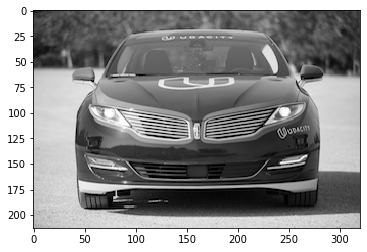

In [2]:
image_path = './data/udacity_sdc.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = image.astype('float32')/255

plt.imshow(image, cmap='gray')
plt.show()

### Filters

In [3]:
f1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) # Sobel
f2 = -f1
f3 = f1.T
f4 = f2.T
filters = np.array([f1,f2,f3,f4])

### CNN

In [4]:
class Cnn(nn.Module):
    def __init__(self, weight):
        super().__init__()
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(k_height, k_width))
        self.conv.weight = torch.nn.Parameter(weight)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        x_conv = self.conv(x)
        x_relu = self.relu(x_conv)
        x_pool = self.pool(x_relu)
        return x_conv, x_relu, x_pool

In [5]:
filters_tensor = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(1)
model = Cnn(weight=filters_tensor)
print(model)

Cnn(
  (conv): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


### Outputs at different layers

In [6]:
x_conv, x_relu, x_pool = model(image_tensor)
x_conv, x_relu, x_pool = x_conv.detach().numpy(), x_relu.detach().numpy(), x_pool.detach().numpy()

### Visualize the outputs

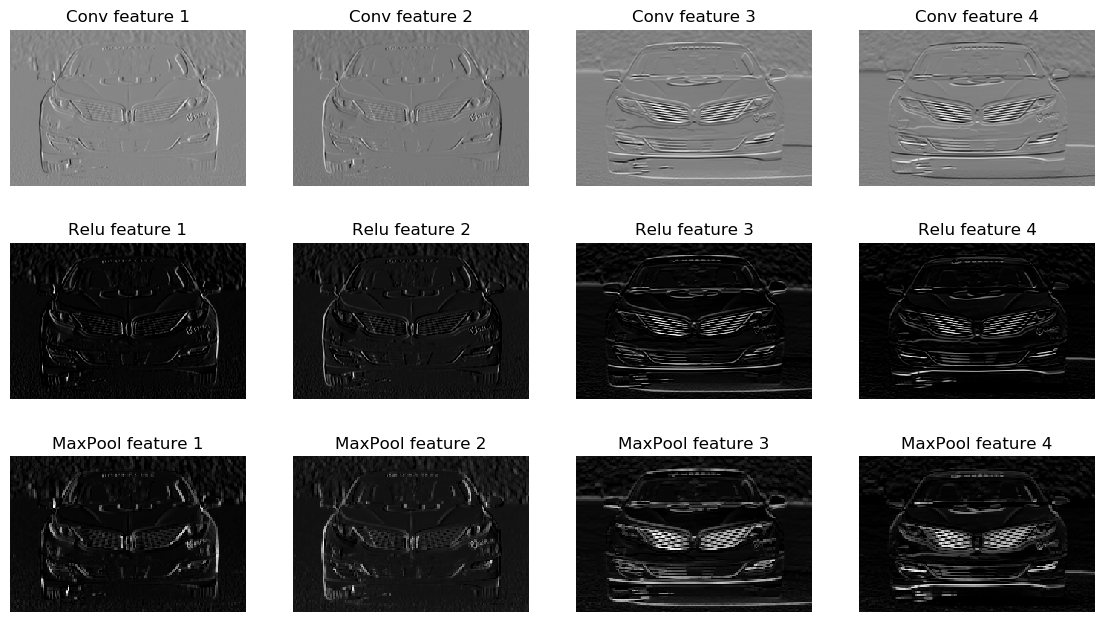

In [7]:
fix, ax = plt.subplots(3,4, figsize=(14,8), dpi=100)
for i in range(4):
    # Conv layer
    ax[0,i].imshow(x_conv[0,i,:,:], cmap='gray')
    ax[0,i].axis('off')
    ax[0,i].set_title('Conv feature '+str(i+1))
    # Relu activation layer
    ax[1,i].imshow(x_relu[0,i,:,:], cmap='gray')
    ax[1,i].axis('off')
    ax[1,i].set_title('Relu feature '+str(i+1))
    # Max pooling layer
    ax[2,i].imshow(x_pool[0,i,:,:], cmap='gray')
    ax[2,i].axis('off')
    ax[2,i].set_title('MaxPool feature '+str(i+1))